# Aplicación a un problema de mínimos cuadrados

Descarguemos el archivo minimos_cuadrados.csv

In [ ]:
!gdown 1qqiRr7w-Wz-3LTcTY1GbbZYjz_8ycaOH

Downloading...
From: https://drive.google.com/uc?id=1qqiRr7w-Wz-3LTcTY1GbbZYjz_8ycaOH
To: /content/minimos_cuadrados.csv
100% 725/725 [00:00<00:00, 2.66MB/s]


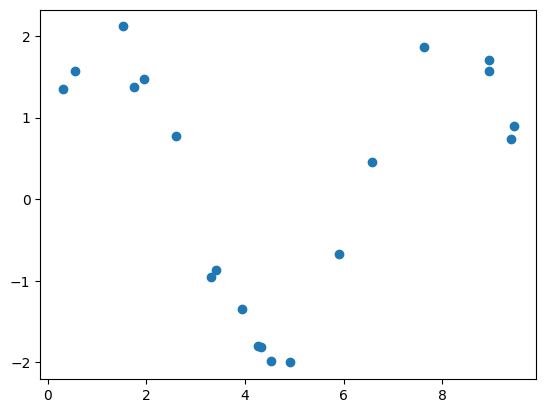

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("minimos_cuadrados.csv")

plt.scatter(data.x, data.y)


In [ ]:
data.head

<bound method NDFrame.head of            x         y
0   4.314013 -1.813436
1   1.532657  2.117339
2   9.403202  0.733510
3   9.449705  0.899666
4   4.530005 -1.978257
5   4.908138 -2.001929
6   8.957594  1.709726
7   3.934945 -1.345736
8   1.952572  1.472533
9   0.549601  1.568709
10  3.305700 -0.956058
11  8.943793  1.576066
12  7.629962  1.866724
13  4.265558 -1.796930
14  3.418711 -0.864583
15  1.747687  1.380384
16  5.907297 -0.677141
17  2.602323  0.773557
18  6.570503  0.452063
19  0.301361  1.352121>

Buscaremos encontrar la "mejor" función
$$y=A sen(\omega x+\phi),$$
es decir, los parámetros $A, \omega$ y $\phi$ que minimizan el error cuadrático. Para ello utilizaremos el Método de Gauss-Newton.

In [ ]:
def predichos(parametros):
  A=parametros[0]
  omega=parametros[1]
  phi=parametros[2]
  predichos=A*np.sin(omega*np.array(data["x"])+phi)
  return predichos

In [ ]:
A=1
omega=0.5
phi=1
parametros=[A, omega, phi]
predichos(parametros)

array([-0.01541318,  0.9809444 , -0.54934845, -0.52977305, -0.12309674,
       -0.30741609, -0.72040643,  0.17324158,  0.91890925,  0.95651218,
        0.46951596, -0.72517517, -0.99474205,  0.00881372,  0.41890306,
        0.95443153, -0.72570322,  0.74493068, -0.91015535,  0.91304177])

In [ ]:
def residuos(parametros):
  r=np.array(data["y"])-predichos(parametros)
  return r

In [ ]:
r=residuos(parametros)
r.T

array([-1.79802279,  1.13639461,  1.28285876,  1.42943857, -1.85516062,
       -1.69451335,  2.4301324 , -1.51897761,  0.55362392,  0.61219694,
       -1.42557421,  2.30124108,  2.86146609, -1.80574342, -1.2834856 ,
        0.42595223,  0.04856201,  0.02862585,  1.36221848,  0.43907895])

In [ ]:
np.mean(r**2)

2.303873243966809

In [ ]:
def gradiente(parametros):
  A=parametros[0]
  omega=parametros[1]
  phi=parametros[2]
  n=len(data)
  r=residuos(parametros)
  parcial_r_A=-np.sin(omega*np.array(data["x"])+phi)
  parcial_r_omega=-A*np.cos(omega*np.array(data["x"])+phi)*np.array(data["x"])
  parcial_r_phi=-A*np.cos(omega*np.array(data["x"])+phi)
  componente_1=2/n*np.dot(r, parcial_r_A)
  componente_2=2/n*np.dot(r, parcial_r_omega)
  componente_3=2/n*np.dot(r, parcial_r_phi)
  return np.array([componente_1, componente_2, componente_3])


In [ ]:
gradiente(parametros)

array([ 0.66742384, -9.39955613, -1.59989904])

## Con gradiente descendiente

In [ ]:
def gradiente_descendiente(f, gradiente, alpha, x0, epsilon, max_iteraciones):
  iteraciones = 0

  tol=epsilon+1

  valores = [] # Lista para almacenar los valores de f

  while tol > epsilon:

    if iteraciones == max_iteraciones:
      print("El algoritmo no convergió en ", max_iteraciones, " iteraciones")
      break

    valores.append(f(x0))

    x0 = x0-alpha*gradiente(x0)

    tol = np.linalg.norm(alpha*gradiente(x0))

    iteraciones += 1
  return x0, valores, iteraciones

In [ ]:
x0=np.random.rand(3)
x0

array([0.88526225, 0.24936044, 0.54923343])

In [ ]:
def f(parametros):
  r=residuos(parametros)
  return np.mean(r**2)

In [ ]:
alpha=0.01
epsilon=10**-6
max_iteraciones=10**4
parametros, valores, iteraciones=gradiente_descendiente(f, gradiente, alpha, x0, epsilon, max_iteraciones)

El algoritmo no convergió en  10000  iteraciones


In [ ]:
parametros

array([0.80012037, 0.01737852, 0.19991402])

In [ ]:
def fit(x, parametros):
  A=parametros[0]
  omega=parametros[1]
  phi=parametros[2]
  return A*np.sin(omega*x+phi)

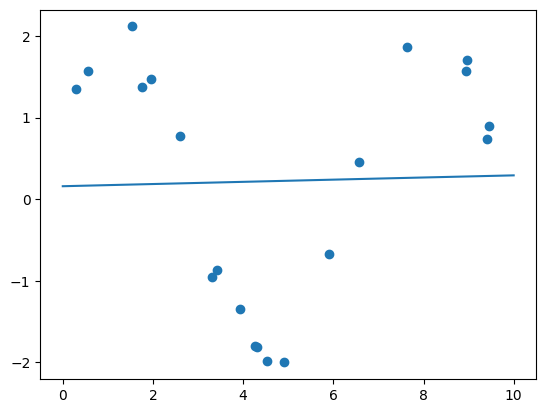

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
y = np.array([fit(t, parametros) for t in x])

plt.scatter(data.x, data.y)
plt.plot(x, y)


## Gauss-Newton

In [ ]:
def Jacobiano(parametros):
  A=parametros[0]
  omega=parametros[1]
  phi=parametros[2]
  n=len(data)
  r=residuos(parametros)
  columna_1=-np.sin(omega*np.array(data["x"])+phi)
  columna_2=-A*np.cos(omega*np.array(data["x"])+phi)*np.array(data["x"])
  columna_3=-A*np.cos(omega*np.array(data["x"])+phi)
  J=np.matrix([columna_1, columna_2, columna_3])
  return np.transpose(J)

In [ ]:
def Gauss_Newton(parametros_iniciales, Jacobiano, residuos, epsilon, max_iter):
  parametros=parametros_iniciales
  tol=epsilon+1
  iter=1
  while tol>epsilon:
    J=Jacobiano(parametros)
    r=residuos(parametros)
    cambio=-(r@J)@np.linalg.inv(J.T@J)
    parametros=parametros+cambio.tolist()[0]
    tol=np.linalg.norm(cambio)
    if iter==max_iter:
      print("El método no convergió en ", max_iter, " iteraciones.")
  return parametros

In [ ]:
parametros_iniciales=np.random.rand(3)
epsilon=10**-6
max_iter=10**3
parametros=Gauss_Newton(parametros_iniciales, Jacobiano, residuos, epsilon, max_iter)

In [ ]:
parametros

array([1.97748797, 0.89992676, 0.51926849])

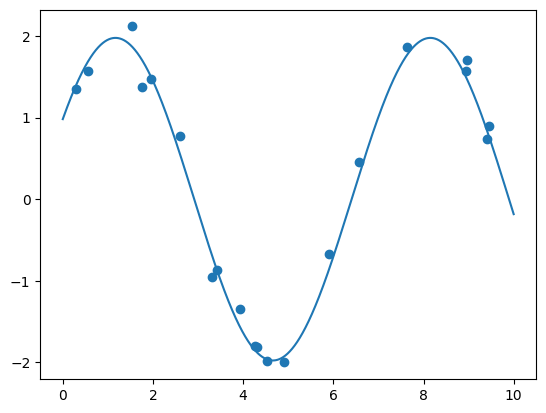

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.001)
y = np.array([fit(t, parametros) for t in x])

plt.scatter(data.x, data.y)
plt.plot(x, y)
plt.show()

## **Ejercicio 1:**

Descarga el archivo data_exponencial.csv. Estimaremos los coeficientes de un modelo

$$y=f(x)=b_0e^{b_1 x}$$

a) Carga la data y realiza un scatterplot de x e y.

b) Implementa la función $f$ en python. Debe recibir como entrada a $x$ y a los parámetros.

c) Implementa la función $r$ que recibe como input a los parámetros y da como output los residuos.

d) Implementa la matriz Jacobiana de $r$ que recibe como input los parámetros y da como output la matriz Jacobiana.

e) Implementa el algoritmo de Gauss-Newton con la modificación de Levenberg-Marquardt.


*   Debe tener como inputs a la matriz Jacobiana, r, los parametros iniciales, mu, la tolerancia y la cantidad máxima de iteraciones.
*   Debe tener como output a los parámetros entrenados y graficar un plot del valor de la función respecto del número de iteración.

f) Grafica la función con los parámetros entrenados sobre el scatterplot.

g) Utiliza scipy.optimize.curve_fit para obtener los parámetros y compáralos con tus resultados.


In [ ]:
!gdown 1l22tLFImTtU9OAl1YFkmyEb720-iK9nT

Downloading...
From: https://drive.google.com/uc?id=1l22tLFImTtU9OAl1YFkmyEb720-iK9nT
To: /content/data_exponencial.csv
100% 2.10k/2.10k [00:00<00:00, 9.87MB/s]


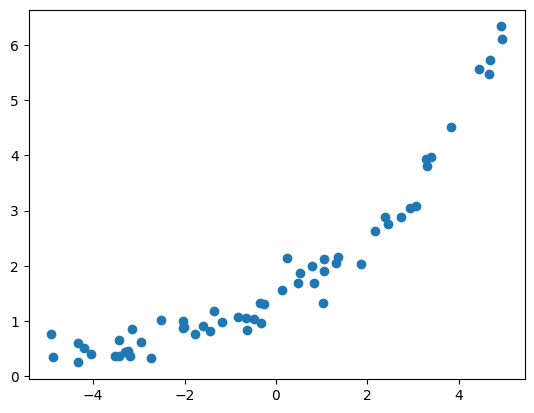

In [ ]:
data_exponencial=pd.read_csv("data_exponencial.csv")

plt.scatter(data_exponencial.x, data_exponencial.y)

# **Ejercicio 2:**

Descarga el archivo data_cubica.csv. Estima los coeficientes del modelo. Corrobora tu resultado con un plot de las variables y la función estimada.

$$y=b_0+b_1x+b_2x^2+b_3x^3$$

In [ ]:
!gdown 17pez27NXzv0Sr_toVSX_fFTj-S37msUp

Downloading...
From: https://drive.google.com/uc?id=17pez27NXzv0Sr_toVSX_fFTj-S37msUp
To: /content/data_cubica.csv
100% 4.42k/4.42k [00:00<00:00, 17.3MB/s]
